# Machine Learning on DDoS

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("DDoS-19.csv", low_memory=False)

In [4]:
df.shape

(431371, 74)

In [5]:
def visual(inp):
    display(inp)

visual(df.describe())

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,431371.000000,...,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05
mean,13.948694,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,20.208259,...,21.893124,-2.315406e+07,3.370905e+04,2.563697e+04,6.757181e+04,1.868363e+04,2.449924e+06,4.983262e+05,2.971142e+06,1.993859e+06
std,4.966712,2.126596e+07,195.888896,56.370208,3.445253e+04,1.064056e+05,320.025929,273.298705,268.577313,70.946085,...,54.559772,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7.914010e+06,2.005164e+06,9.045327e+06,7.245561e+06
min,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,0.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,17.000000,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,0.000000,...,3.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,17.000000,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,0.000000,...,13.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,17.000000,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290500,2221.556200,...,18766.000000,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 74 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  431371 non-null  int64  
 1   Flow Duration             431371 non-null  int64  
 2   Total Fwd Packets         431371 non-null  int64  
 3   Total Backward Packets    431371 non-null  int64  
 4   Fwd Packets Length Total  431371 non-null  int64  
 5   Bwd Packets Length Total  431371 non-null  int64  
 6   Fwd Packet Length Max     431371 non-null  int64  
 7   Fwd Packet Length Min     431371 non-null  int64  
 8   Fwd Packet Length Mean    431371 non-null  float64
 9   Fwd Packet Length Std     431371 non-null  float64
 10  Bwd Packet Length Max     431371 non-null  int64  
 11  Bwd Packet Length Min     431371 non-null  int64  
 12  Bwd Packet Length Mean    431371 non-null  float64
 13  Bwd Packet Length Std     431371 non-null  float64
 14 

In [7]:
# convert pandas dataframe to numpy array
data=df.to_numpy()
data.shape

(431371, 74)

In [8]:
# split data sample and features value
n_samples, n_features= data.shape

# decreament features by one because of the first feature
n_features=n_features-1

# split data to X and last feature which is 'Label' to y
X=data[:,0:n_features]
y=data[:,n_features]

print(X.shape)
print(y.shape)

(431371, 73)
(431371,)


In [9]:
# create 10 folds for cross validation
folds=StratifiedKFold(n_splits=10)
folds

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

### Training (80%) & Testing (20%)

In [10]:
# split data to train and test parts
x_train, x_test, y_train, y_test=train_test_split(X,y,train_size=0.8)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression

Accuracy_score: 99.52%
Precision_score: 99.77%
Recall_score: 99.61%
F1_score: 99.69%


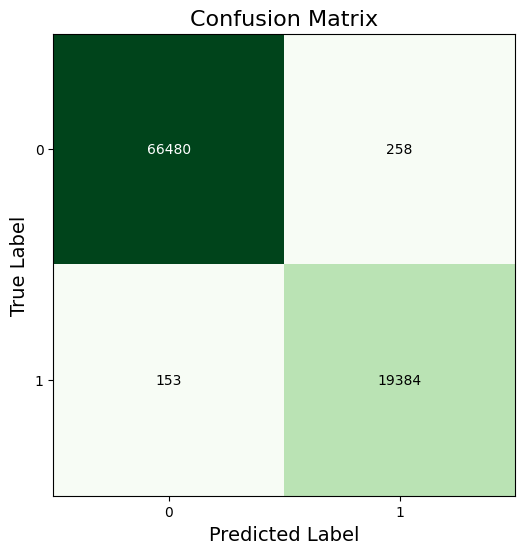

In [11]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

AUC: 0.000758864270540932


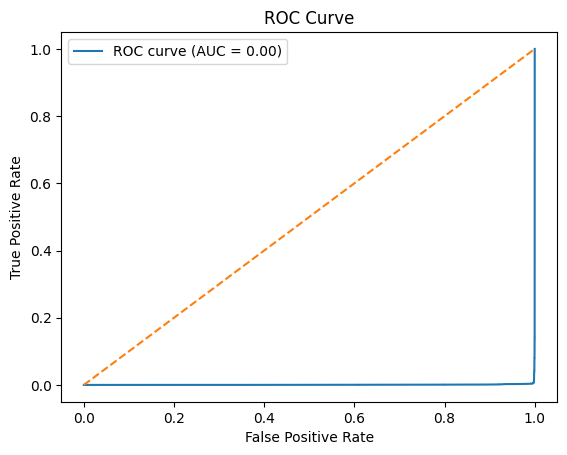

In [12]:
# probability of positive class
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Attack')
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Random Forest

Accuracy_score: 99.93%
Precision_score: 99.97%
Recall_score: 99.94%
F1_score: 99.95%


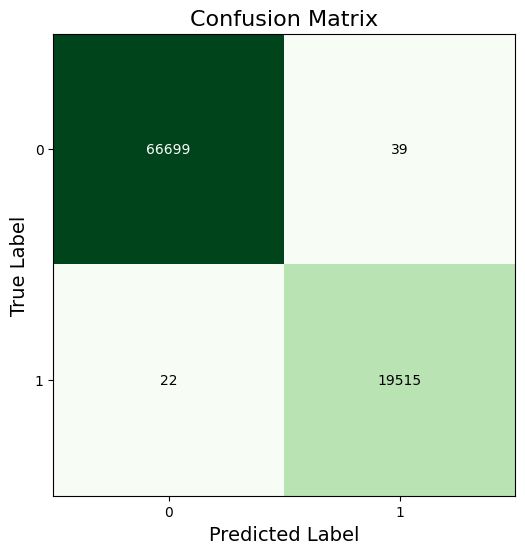

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=50)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## Decision Tree

Accuracy_score: 99.08%
Precision_score: 99.39%
Recall_score: 99.42%
F1_score: 99.40%


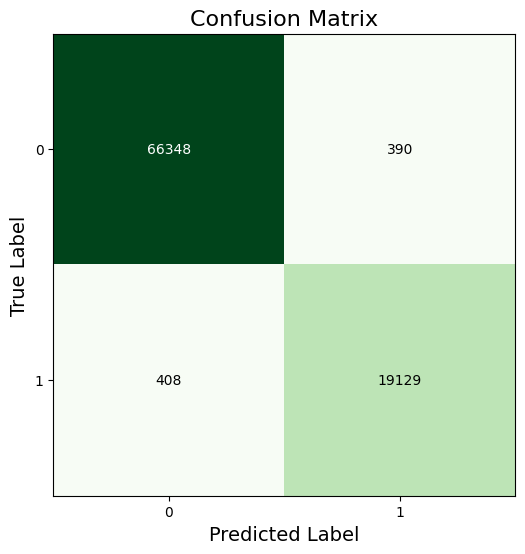

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
model = DecisionTreeClassifier(criterion="gini", max_depth=3)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## K-NN

Accuracy_score: 99.59%
Precision_score: 99.72%
Recall_score: 99.75%
F1_score: 99.74%


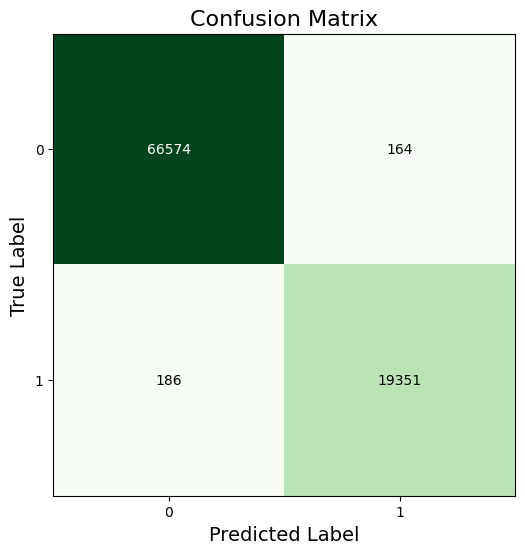

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-NN model
model = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## SVM

Accuracy_score: 99.55%
Precision_score: 99.81%
Recall_score: 99.60%
F1_score: 99.71%


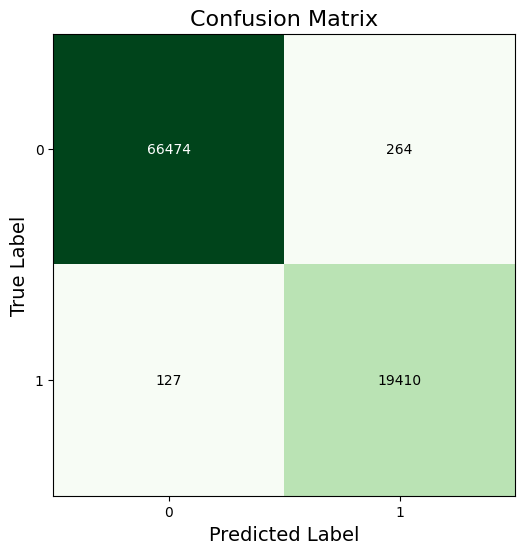

In [16]:
from sklearn.svm import LinearSVC

# Create a Logistic Regression model
model = LinearSVC(C=1.0, max_iter=10000)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Attack') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## XGBoost

Accuracy_score: 99.95%
Precision_score: 99.86%
Recall_score: 99.91%
F1_score: 99.89%


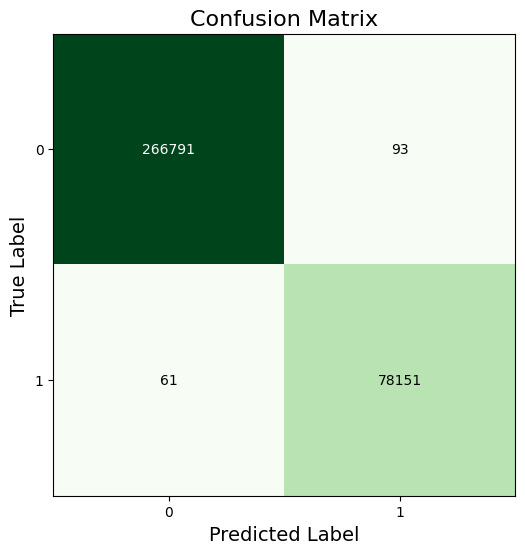

In [17]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode Class Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# split data to train and test parts as Encoded
x_tra, x_tes, y_tra, y_tes = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create an XGBoost model
model = XGBClassifier(
    tree_method="hist",
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    n_jobs=-1
)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_tra, y_tra, cv=folds)
# Train the model
model.fit(x_tra, y_tra)
# Test on unseen data
y_test_pred = model.predict(x_tes)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_tes, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_tes, y_test_pred) * 100:.2f}%")
print(f"Recall_score: {recall_score(y_tes, y_test_pred) * 100:.2f}%")
print(f"F1_score: {f1_score(y_tes, y_test_pred) * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_tra, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()